In [ ]:
from elevator import (
    People,
    InternalQueue,
    ExternalQueue,
    Outlist,
    Elevator,
    OutlistMethods,
    QueueMethods,
    Generator,
)
import pprint as pp
import matplotlib.pyplot as plt

meanWaitingTimeHistory = []
meanJourneyTimeHistory = []
meanElevatorBreakCountHistory = []

floorAmount = 6
insideQueue = InternalQueue(floorAmount=floorAmount)
externalQueueUp = ExternalQueue(floorAmount=floorAmount)
externalQueueDown = ExternalQueue(floorAmount=floorAmount)
outlist = Outlist()
elevator = Elevator(
    currentDirection=False,
    currentFloor=0,
    lowestFloor=0,
    highestFloor=floorAmount - 1,
    carryingCapacity=10,
    bufferCutoff=80,
    internalQueue=insideQueue,
    externalQueueUp=externalQueueUp,
    externalQueueDown=externalQueueDown,
    outlist=outlist,
    activeSpeed=40,
    bufferSpeed=10,
)

weightsPerFloor = [[0,1,18,25,25,31],[1,0,1,30,39,39],[40,1,0,1,28,10],[33,33,1,0,1,32],[44,42,12,1,0,1],[30,27,21,21,1,0]]
attemptPerFloor = [4,3,1,1,2,2]

generators = []
for i in range(floorAmount):
    generators.append(
        Generator(
            initFloor=i,
            finalFloorRange=list(range(floorAmount)),
            finalFloorWeight=weightsPerFloor[i],
            amountRange=[1 for _ in range(1,5)],
            amountWeight=[7, 1, 1, 1],
            targetElevator=elevator,
            attemptPerCall=attemptPerFloor[i],
            probability=0.001,
        )
    )

def simulateElevator(steps: int = 1, printInfo: bool = False):
    for _ in range(steps):
        for i in generators:
            i.generatePeopleToElevator()

        elevator.progressElevator()
        meanWaitingTimeHistory.append(outStats.meanWaitingTime())
        meanJourneyTimeHistory.append(outStats.meanJourneyTime())
        meanElevatorBreakCountHistory.append(outStats.meanElevatorBreakCount())
        if printInfo:
        	elevator.printElevatorInfo()

outStats = OutlistMethods(outlist)

elevator.currentFloor = 0
elevator.currentDirection = True
elevator.outlist.outlist.clear()
elevator.printElevatorInfo()

Progression: 0
Current Floor: 0
Next Floor: 0
Current Direction: True
Internal Queue: [[], [], [], [], [], []]
External Queue Up: [[], [], [], [], [], []]
External Queue Down: [[], [], [], [], [], []]
Outlist: []


In [2]:
simulateElevator(1)

Mean Waiting Time: 14603.61096092406
Mean Journey Time: 2757.469402801671
Mean Elevator Breaks: 99.73629884492505
6,14603.61096092406,2757.469402801671,99.73629884492505


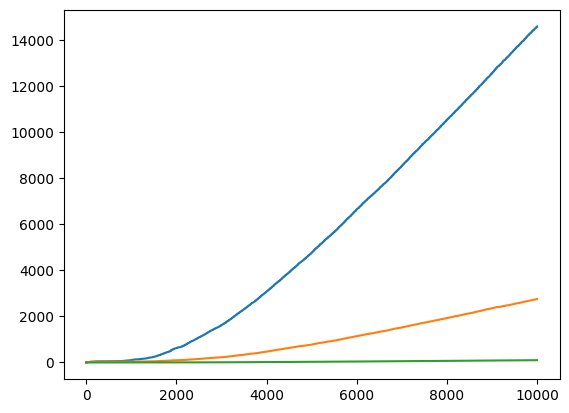

In [3]:
simulateElevator(10000)
plt.plot(meanWaitingTimeHistory)
plt.plot(meanJourneyTimeHistory)
plt.plot(meanElevatorBreakCountHistory)
print(f"Mean Waiting Time: {meanWaitingTimeHistory[-1]}")
print(f"Mean Journey Time: {meanJourneyTimeHistory[-1]}")
print(f"Mean Elevator Breaks: {meanElevatorBreakCountHistory[-1]}")
print(
    f"{floorAmount},{meanWaitingTimeHistory[-1]},{meanJourneyTimeHistory[-1]},{meanElevatorBreakCountHistory[-1]}"
)